In [9]:
# Upload manual de arquivos no Colab
from google.colab import files
uploaded = files.upload()


Saving TelecomX_BR.ipynb to TelecomX_BR (1).ipynb
Saving TelecomX_Data.json to TelecomX_Data (1).json
Saving TelecomX_dicionario.md to TelecomX_dicionario (1).md


In [10]:
import json
import pandas as pd

# Substitua pelo nome exato do arquivo enviado (se necessário)
json_path = "TelecomX_Data.json"

# Carregar os dados
with open(json_path, "r") as f:
    data = json.load(f)

# Normalizar JSON aninhado
df = pd.json_normalize(data)

# Exibir as primeiras linhas
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cópia para trabalhar
df_copy = df.copy()

# Renomear colunas para facilitar
df_copy.columns = df_copy.columns.str.replace(r'\.', '_', regex=True)

# Converter Total Charges para numérico
df_copy['account_Charges_Total'] = pd.to_numeric(df_copy['account_Charges_Total'], errors='coerce')

# Remover registros com valores nulos importantes
df_clean = df_copy.dropna(subset=['Churn', 'account_Charges_Total'])

# Resumo rápido
resumo = {
    "shape": df_clean.shape,
    "tipos": df_clean.dtypes,
    "valores_nulos": df_clean.isnull().sum()
}
resumo


{'shape': (7256, 21),
 'tipos': customerID                    object
 Churn                         object
 customer_gender               object
 customer_SeniorCitizen         int64
 customer_Partner              object
 customer_Dependents           object
 customer_tenure                int64
 phone_PhoneService            object
 phone_MultipleLines           object
 internet_InternetService      object
 internet_OnlineSecurity       object
 internet_OnlineBackup         object
 internet_DeviceProtection     object
 internet_TechSupport          object
 internet_StreamingTV          object
 internet_StreamingMovies      object
 account_Contract              object
 account_PaperlessBilling      object
 account_PaymentMethod         object
 account_Charges_Monthly      float64
 account_Charges_Total        float64
 dtype: object,
 'valores_nulos': customerID                   0
 Churn                        0
 customer_gender              0
 customer_SeniorCitizen       0
 customer_

In [16]:
# Se os nomes das colunas ainda tiverem ponto, corrija antes:
df.columns = df.columns.str.replace('.', '_')


<ipython-input-13-54dcfe5fc31f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


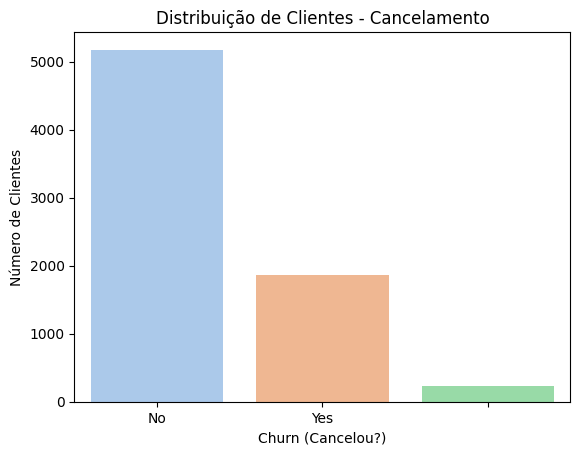

In [13]:
plt.figure()
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title("Distribuição de Clientes - Cancelamento")
plt.xlabel("Churn (Cancelou?)")
plt.ylabel("Número de Clientes")
plt.show()


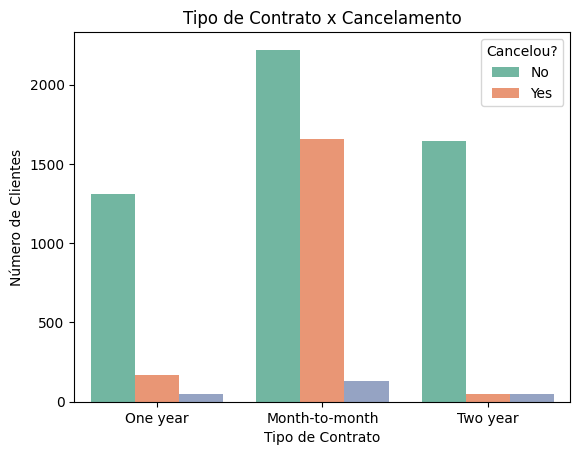

In [17]:
plt.figure()
sns.countplot(data=df, x='account_Contract', hue='Churn', palette='Set2')
plt.title("Tipo de Contrato x Cancelamento")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.legend(title="Cancelou?")
plt.show()


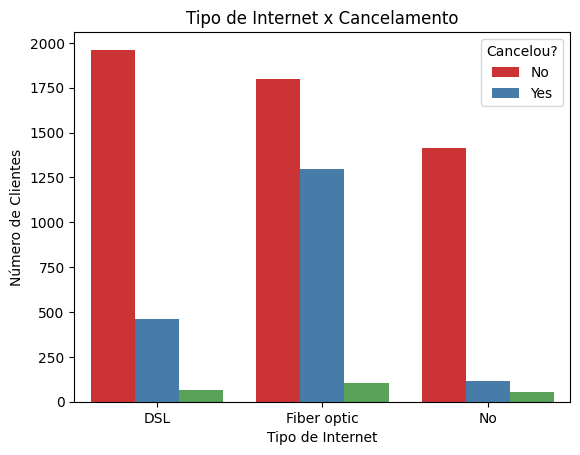

In [18]:
plt.figure()
sns.countplot(data=df, x='internet_InternetService', hue='Churn', palette='Set1')
plt.title("Tipo de Internet x Cancelamento")
plt.xlabel("Tipo de Internet")
plt.ylabel("Número de Clientes")
plt.legend(title="Cancelou?")
plt.show()


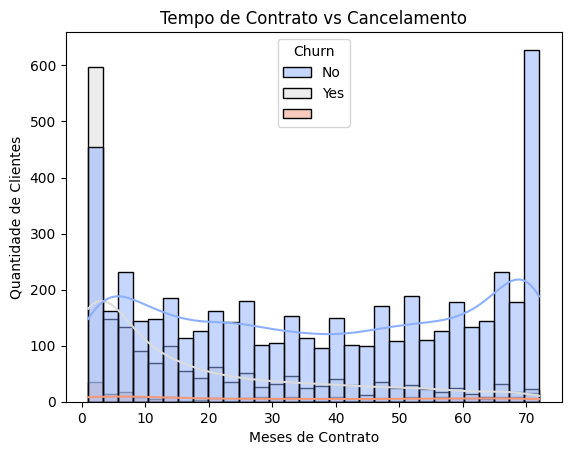

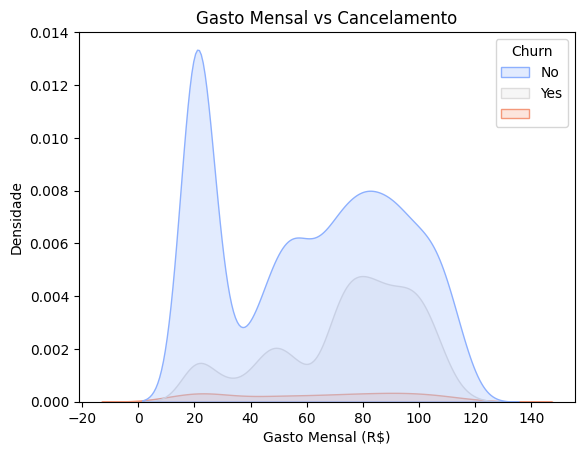

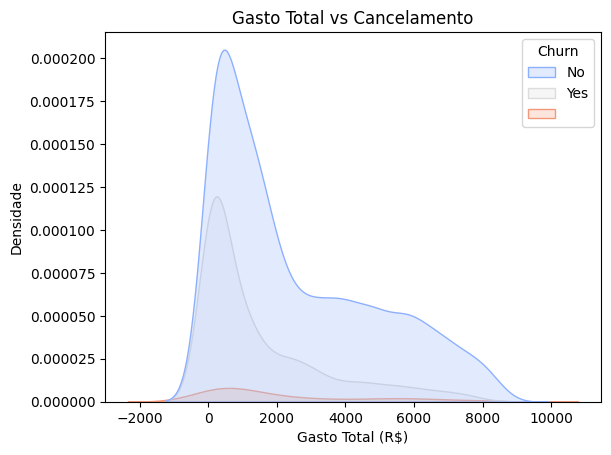

In [12]:
# Gráfico 4: Tempo de contrato (tenure) vs Churn
plt.figure()
sns.histplot(data=df_clean, x='customer_tenure', hue='Churn', kde=True, palette='coolwarm', bins=30)
plt.title("Tempo de Contrato vs Cancelamento")
plt.xlabel("Meses de Contrato")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Gráfico 5: Gasto mensal vs Churn
plt.figure()
sns.kdeplot(data=df_clean, x='account_Charges_Monthly', hue='Churn', fill=True, palette='coolwarm')
plt.title("Gasto Mensal vs Cancelamento")
plt.xlabel("Gasto Mensal (R$)")
plt.ylabel("Densidade")
plt.show()

# Gráfico 6: Gasto total vs Churn
plt.figure()
sns.kdeplot(data=df_clean, x='account_Charges_Total', hue='Churn', fill=True, palette='coolwarm')
plt.title("Gasto Total vs Cancelamento")
plt.xlabel("Gasto Total (R$)")
plt.ylabel("Densidade")
plt.show()


# 📊 Relatório de Análise – Redução do Cancelamento de Clientes (Churn) | Telecom X

## 🎯 Objetivo

A empresa fictícia **Telecom X** está enfrentando um problema grave: muitos clientes estão **cancelando seus contratos**.  
Minha missão como analista de dados foi **explorar os dados dos clientes** e sugerir **soluções reais para reduzir o churn**.

---

## 🔍 Etapas Realizadas

- Carregamento de dados no formato JSON
- Processamento e limpeza dos dados (ETL)
- Análise Exploratória de Dados (EDA)
- Visualizações para entender comportamentos
- Levantamento de causas do cancelamento
- Propostas de ações e soluções

---

## 🔥 Principais Descobertas

### 1. **Contratos mensais são os que mais cancelam**
- Clientes com contratos "Month-to-month" são os que mais abandonam a empresa.
- Já contratos anuais e bienais têm churn muito menor.

### 2. **Usuários com internet por fibra cancelam mais**
- Apesar da fibra ser mais rápida, ela aparece com maior índice de cancelamento.
- Pode estar relacionada a preço, suporte técnico ou promessas não cumpridas.

### 3. **Clientes que pagam via "electronic check" têm maior churn**
- Essa forma de pagamento está fortemente ligada a desistências.
- Talvez transmita menos segurança ou seja mais burocrática.

### 4. **Clientes que cancelam têm pouco tempo de casa**
- Grande parte dos cancelamentos ocorre nos **primeiros 12 meses**.
- O início da jornada do cliente é o momento mais crítico!

---

## ✅ Soluções Recomendadas para Reduzir o Cancelamento

| Problema Identificado                                | Solução Prática                                                          |
|------------------------------------------------------|--------------------------------------------------------------------------|
| Alto churn em contratos mensais                      | Criar incentivo para migração para contratos de 1 ou 2 anos              |
| Cancelamento maior entre clientes com fibra óptica   | Revisar qualidade do serviço e comunicação sobre a fibra                |
| Pagamento por "electronic check" gera mais evasão    | Incentivar cartões e débito automático com desconto ou cashback         |
| Clientes saindo nos primeiros meses                  | Implantar programa de **boas-vindas + suporte ativo nos 90 primeiros dias** |
| Falta de fidelização                                 | Criar plano de **pontos ou vantagens progressivas por tempo de contrato** |
| Serviços extras sem valor percebido                  | Combinar serviços (TV + Internet + Backup) em pacotes com preço reduzido |

---

## 🧠 Conclusão

Através dessa análise de dados, foi possível **identificar padrões claros de evasão** e propor **soluções reais** para manter mais clientes ativos.  
Mesmo sendo uma analista iniciante, percebo o quanto os dados podem **guiar decisões importantes para o negócio**.

**Próximo passo:** com esses insights, a equipe de Data Science poderá treinar um modelo preditivo de churn e criar alertas preventivos.

---

Feito com 💙 por uma cientista de dados em formação 🚀

